Available Sectors:
1. Technology
2. Healthcare
3. Financial
4. Energy
5. Consumer Discretionary

Select a sector by number: 2

Available stocks in Healthcare sector:
1. Johnson & Johnson (JNJ)
2. Pfizer (PFE)
3. Moderna (MRNA)
4. Gilead Sciences (GILD)
5. AbbVie (ABBV)

Select a stock by number: 3
Loading data for MRNA...

What would you like to do?
1. Plot Closing Prices
2. Analyze Moving Averages
3. Predict Future Prices
4. Exit
Enter your choice: 3
Mean Squared Error: 22.28
R-squared: 0.96


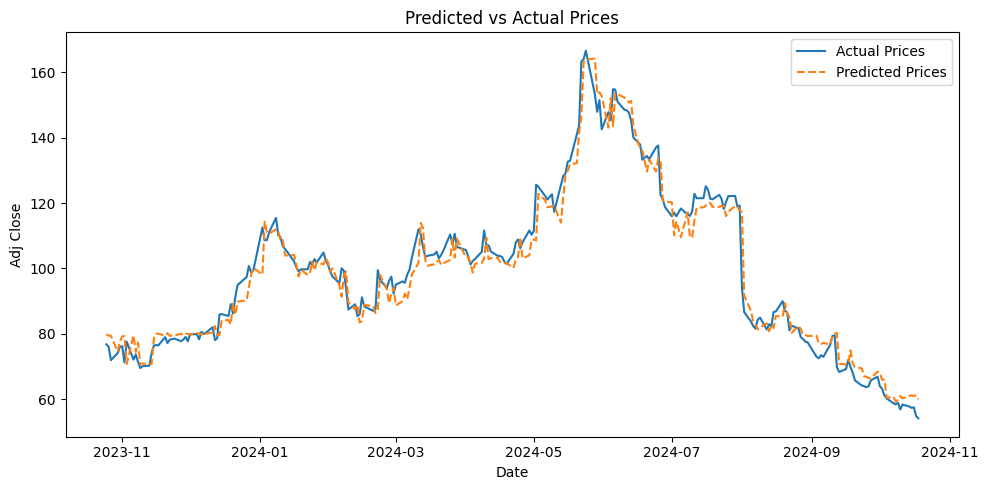


What would you like to do?
1. Plot Closing Prices
2. Analyze Moving Averages
3. Predict Future Prices
4. Exit
Enter your choice: 1


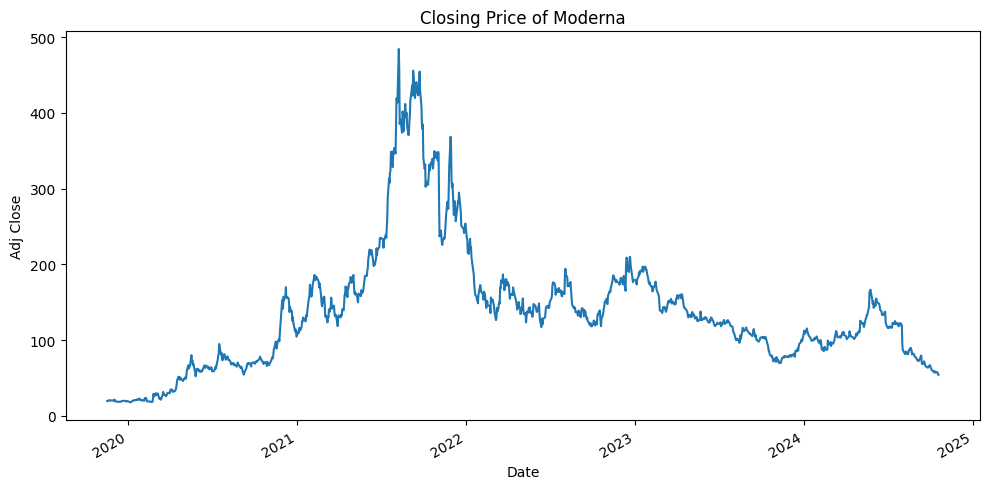


What would you like to do?
1. Plot Closing Prices
2. Analyze Moving Averages
3. Predict Future Prices
4. Exit
Enter your choice: 2

Analysis for Moderna:
            Adj Close    20_MA    50_MA     200_MA
Date                                              
2024-10-14  57.730000  63.0485  73.0606  103.96295
2024-10-15  57.310001  62.3145  72.5318  103.75555
2024-10-16  57.459999  61.6945  72.0350  103.54560
2024-10-17  54.820000  61.0345  71.5004  103.25720
2024-10-18  54.099998  60.4550  70.8960  102.98480

What would you like to do?
1. Plot Closing Prices
2. Analyze Moving Averages
3. Predict Future Prices
4. Exit
Enter your choice: 4
Goodbye!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define sector and their stocks
sector_stocks = {
    "Technology": [
        {"company_name": "Apple", "ticker": "AAPL"},
        {"company_name": "Microsoft", "ticker": "MSFT"},
        {"company_name": "NVIDIA", "ticker": "NVDA"},
        {"company_name": "Intel", "ticker": "INTC"},
        {"company_name": "Cisco", "ticker": "CSCO"}
    ],
    "Healthcare": [
        {"company_name": "Johnson & Johnson", "ticker": "JNJ"},
        {"company_name": "Pfizer", "ticker": "PFE"},
        {"company_name": "Moderna", "ticker": "MRNA"},
        {"company_name": "Gilead Sciences", "ticker": "GILD"},
        {"company_name": "AbbVie", "ticker": "ABBV"}
    ],
    "Financial": [
        {"company_name": "JPMorgan Chase", "ticker": "JPM"},
        {"company_name": "Goldman Sachs", "ticker": "GS"},
        {"company_name": "Bank of America", "ticker": "BAC"},
        {"company_name": "Wells Fargo", "ticker": "WFC"},
        {"company_name": "Morgan Stanley", "ticker": "MS"}
    ],
    "Energy": [
        {"company_name": "Exxon Mobil", "ticker": "XOM"},
        {"company_name": "Chevron", "ticker": "CVX"},
        {"company_name": "ConocoPhillips", "ticker": "COP"},
        {"company_name": "Schlumberger", "ticker": "SLB"},
        {"company_name": "Halliburton", "ticker": "HAL"}
    ],
    "Consumer Discretionary": [
        {"company_name": "Amazon", "ticker": "AMZN"},
        {"company_name": "Tesla", "ticker": "TSLA"},
        {"company_name": "Home Depot", "ticker": "HD"},
        {"company_name": "Nike", "ticker": "NKE"},
        {"company_name": "McDonald's", "ticker": "MCD"}
    ]
}

# Function to download data
def download_data(ticker):
    print(f"Loading data for {ticker}...")
    try:
        stock_data = yf.download(ticker, period="5y", progress=False)  # Download 5 years of data
        stock_data['Adj Close'] = stock_data['Adj Close']
        return stock_data
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
        return None

# Plot closing prices
def plot_closing_prices(stock_data, company_name):
    plt.figure(figsize=(10, 5))
    stock_data['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {company_name}")
    plt.tight_layout()
    plt.show()

# Analyze stock (moving averages)
def analyze_stock(stock_data, company_name):
    stock_data['20_MA'] = stock_data['Adj Close'].rolling(window=20).mean()
    stock_data['50_MA'] = stock_data['Adj Close'].rolling(window=50).mean()
    stock_data['200_MA'] = stock_data['Adj Close'].rolling(window=200).mean()
    print(f"\nAnalysis for {company_name}:")
    print(stock_data[['Adj Close', '20_MA', '50_MA', '200_MA']].tail())

# Predict future prices (improved)
def predict_future_prices(stock_data):
    stock_data['Date'] = pd.to_datetime(stock_data.index)
    stock_data['Date_ordinal'] = stock_data['Date'].map(pd.Timestamp.toordinal)

    # Feature engineering
    stock_data['MA_7'] = stock_data['Adj Close'].rolling(window=7).mean()
    stock_data['MA_21'] = stock_data['Adj Close'].rolling(window=21).mean()
    stock_data['lag_1'] = stock_data['Adj Close'].shift(1)
    stock_data.dropna(inplace=True)

    X = stock_data[['Date_ordinal', 'MA_7', 'MA_21', 'lag_1']]
    y = stock_data['Adj Close']

    # Feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'][-len(y_test):], y_test, label='Actual Prices')
    plt.plot(stock_data['Date'][-len(y_test):], y_pred, label='Predicted Prices', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.title('Predicted vs Actual Prices')
    plt.legend()
    plt.tight_layout()
    plt.show()

# User interface
def user_interface():
    print("Available Sectors:")
    for i, sector in enumerate(sector_stocks.keys(), 1):
        print(f"{i}. {sector}")

    while True:
        try:
            sector_choice = int(input("\nSelect a sector by number: ")) - 1
            if 0 <= sector_choice < len(sector_stocks):
                break
            else:
                print("Invalid choice. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    sector_name = list(sector_stocks.keys())[sector_choice]
    print(f"\nAvailable stocks in {sector_name} sector:")
    for i, company in enumerate(sector_stocks[sector_name], 1):
        print(f"{i}. {company['company_name']} ({company['ticker']})")

    while True:
        try:
            stock_choice = int(input("\nSelect a stock by number: ")) - 1
            if 0 <= stock_choice < len(sector_stocks[sector_name]):
                break
            else:
                print("Invalid choice. Please try again.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    company = sector_stocks[sector_name][stock_choice]
    stock_data = download_data(company['ticker'])
    if stock_data is None:
        return  # Exit if data download failed

    while True:
        print("\nWhat would you like to do?")
        print("1. Plot Closing Prices")
        print("2. Analyze Moving Averages")
        print("3. Predict Future Prices")
        print("4. Exit")

        action_choice = input("Enter your choice: ")
        if action_choice == '1':
            plot_closing_prices(stock_data, company['company_name'])
        elif action_choice == '2':
            analyze_stock(stock_data, company['company_name'])
        elif action_choice == '3':
            predict_future_prices(stock_data)
        elif action_choice == '4':
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the UI
if __name__ == "__main__":
    user_interface()